<div style="text-align: right">Prepared By:</div>
<div style="text-align: right">Kakembo Fredrick Elishama  </div>
<div style="text-align: right">Reg No:  2019/HD07/24859U  </div>

## 1. Preparing my Data Problem


In [116]:
#Loading the required libraries and printing the versions used
#Versions are very helpful for reproducibility purposes

#Ignoring any annoying errors from my cells
import warnings
warnings.filterwarnings('ignore')

#Python version
import sys
print('Python: {}'.format(sys.version))

#Scipy
import scipy
print("Scipy: {}".format(scipy.__version__))

import pandas as pd #This is for reading and manipulating tabular data 
print('Pandas:  {}'.format(pd.__version__))

import numpy as np  #This is for numerical computing
print('numpy: {}'.format(np.__version__))

import matplotlib
import matplotlib.pyplot as plt #Generating simple visualizations
print('Matplotlib:  {}'.format(matplotlib.__version__))

import seaborn as sns  #for generating statistical plots
print('Seaborn:  {}'.format(sns.__version__))

# scikit-learn
import sklearn
print('scikit-learn:  {}'.format(sklearn.__version__))

Python: 3.7.4 (default, Aug 13 2019, 15:17:50) 
[Clang 4.0.1 (tags/RELEASE_401/final)]
Scipy: 1.4.1
Pandas:  0.25.1
numpy: 1.17.2
Matplotlib:  3.1.1
Seaborn:  0.9.0
scikit-learn:  0.21.3


In [3]:
## Loading my datasets
train_data = pd.read_csv("ace-class-assignment/AMP_TrainSet.csv")
test_data = pd.read_csv("ace-class-assignment/Test.csv")

#Viewing a sample of the data
train_data.head(8)  #The first 8 lines of the training dataset

,FULL_Charge,FULL_AcidicMolPerc,FULL_AURR980107,FULL_DAYM780201,FULL_GEOR030101,FULL_OOBM850104,NT_EFC195,AS_MeanAmphiMoment,AS_DAYM780201,AS_FUKS010112,CT_RACS820104,CLASS
0,5.0,0.000,0.951,74.842,0.975,-3.663,0,0.282,73.444,5.661,1.041,1
1,4.0,5.405,0.931,71.595,0.957,-4.011,1,0.600,68.222,6.537,1.453,1
2,5.5,5.405,0.873,73.595,0.961,-2.512,0,0.593,69.444,4.934,1.722,1
3,5.0,4.167,0.895,66.250,0.999,-1.362,0,0.614,67.222,4.316,1.382,1
4,7.5,8.537,0.932,64.720,0.979,-2.091,0,0.616,72.944,4.540,1.539,1
5,5.0,7.692,1.030,78.949,0.976,-3.091,1,0.511,78.778,5.992,1.091,1
6,3.0,6.897,0.930,78.586,0.957,-3.544,1,0.385,78.222,6.284,1.467,1
7,2.0,5.882,0.868,76.588,0.949,-5.832,0,0.154,76.588,6.479,1.086,1


In [4]:
test_data.head(8) #Viewing the first 8 observations of the test dataset

,FULL_Charge,FULL_AcidicMolPerc,FULL_AURR980107,FULL_DAYM780201,FULL_GEOR030101,FULL_OOBM850104,NT_EFC195,AS_MeanAmphiMoment,AS_DAYM780201,AS_FUKS010112,CT_RACS820104
0,4.0,3.704,0.873,73.519,0.987,-4.833,0,0.382,74.556,7.225,1.234
1,4.0,4.444,0.892,62.444,0.931,-0.584,0,0.320,56.056,4.942,1.853
2,2.0,0.000,0.901,47.000,1.039,-5.664,0,0.164,47.000,5.969,1.174
3,4.5,0.000,0.869,69.222,0.982,-5.423,0,2.010,69.222,5.462,1.138
4,-4.0,21.591,1.061,71.682,0.976,-2.002,0,2.758,66.000,5.582,1.453
5,4.5,6.977,0.895,68.512,0.950,-1.878,0,3.090,72.000,5.779,1.844
6,12.0,3.175,1.022,74.460,1.010,-3.225,0,3.172,76.722,5.664,1.215
7,1.5,3.704,0.932,69.519,0.977,-2.509,0,2.543,72.000,4.251,1.560


## 2. Summarizing Data

### Checking Dimensions of my train data
This is to enable me know the number of rows and columns in my data. This gives an idea of the size of the data (number of observations) as well as the number of features i will have to deal with.
This is done using the `shape` function in pandas


In [5]:
train_data.shape

(3038, 12)

From the output above i have 3,038 observations with 12 features. 

Let me list all the features in my data, using the `columns` function of pandas. This 

In [6]:
train_data.columns  #Listing all the columns i have in my dataset

Index(['FULL_Charge', 'FULL_AcidicMolPerc', 'FULL_AURR980107',
       'FULL_DAYM780201', 'FULL_GEOR030101', 'FULL_OOBM850104', 'NT_EFC195',
       'AS_MeanAmphiMoment', 'AS_DAYM780201', 'AS_FUKS010112', 'CT_RACS820104',
       'CLASS'],
      dtype='object')

#### Datatypes
Now exploring the datatypes of each feature. This is important because different dtypes are treated diffrently. eg strings its better to convert them to categorical values. 
The different data types are got using either `dtypes` or the `info()` function.

In [7]:
train_data.info()  #Checking the data types for each faeture

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3038 entries, 0 to 3037
Data columns (total 12 columns):
FULL_Charge           3038 non-null float64
FULL_AcidicMolPerc    3038 non-null float64
FULL_AURR980107       3038 non-null float64
FULL_DAYM780201       3038 non-null float64
FULL_GEOR030101       3038 non-null float64
FULL_OOBM850104       3038 non-null float64
NT_EFC195             3038 non-null int64
AS_MeanAmphiMoment    3038 non-null float64
AS_DAYM780201         3038 non-null float64
AS_FUKS010112         3038 non-null float64
CT_RACS820104         3038 non-null float64
CLASS                 3038 non-null int64
dtypes: float64(10), int64(2)
memory usage: 284.9 KB


From this i can see that almost all my features have float values, a few have values indicated as integers which in actual sense are categorical values ie 0 and 1. For this matter i don't have to do anything much with changing the types of the features. 

It seems like the data doesnot as well have any missing values since i have an *equal number of observation* in each feature.

## Descriptive Statistics

Lets generate some discriptive statistics on our data. This will give me a more idea of the kind of data i am dealing with as well as some relationships that may be associated with the different features. This will include generating for things such as;
- Mean, counts, sd, min,max, etc
- Description of the outcome
- Correlation between features


In [8]:
# First i will use the describe to get some descriptive statistics
train_data.describe()

,FULL_Charge,FULL_AcidicMolPerc,FULL_AURR980107,FULL_DAYM780201,FULL_GEOR030101,FULL_OOBM850104,NT_EFC195,AS_MeanAmphiMoment,AS_DAYM780201,AS_FUKS010112,CT_RACS820104,CLASS
count,3038.000000,3038.000000,3038.000000,3038.000000,3038.000000,3038.000000,3038.000000,3038.000000,3038.000000,3038.000000,3038.000000,3038.000000
mean,2.060237,8.521520,0.971410,73.668760,0.994007,-2.432927,0.088545,15.683233,73.650828,5.911361,1.235255,0.500000
std,3.819929,7.586652,0.107413,8.527489,0.031333,1.707223,0.284133,11.575665,9.166092,0.693689,0.210012,0.500082
min,-16.000000,0.000000,0.684000,42.750000,0.866000,-10.432000,0.000000,0.041000,42.778000,3.533000,0.785000,0.000000
25%,0.000000,2.516000,0.895000,68.294000,0.974000,-3.606000,0.000000,5.587500,67.556000,5.459250,1.082000,0.000000
50%,2.000000,7.143000,0.963000,74.059500,0.994000,-2.296500,0.000000,14.988500,73.697000,5.925500,1.184000,0.500000
75%,4.000000,13.158000,1.041000,79.343750,1.011000,-1.283250,0.000000,26.807750,79.778000,6.382000,1.351000,1.000000
max,30.000000,46.667000,1.451000,101.682000,1.196000,3.576000,1.000000,51.280000,103.167000,8.662000,2.192000,1.000000


### Distribution of the outcome

Lets first generate a bar chart to see how the predicted values are distributed by counts. Our target is having an outcome that is fairly balanced so as not to bais training process.

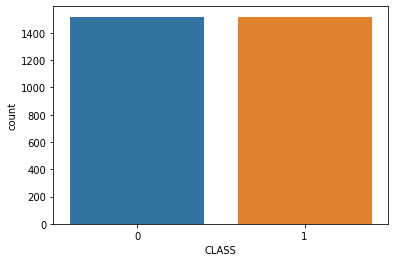

In [9]:
sns.countplot(x="CLASS", data=train_data) #Plots the frequency of the 0's and 1's in the class field

   A similar graph could be generated using `matplotlib.pyplot` with the code below.   

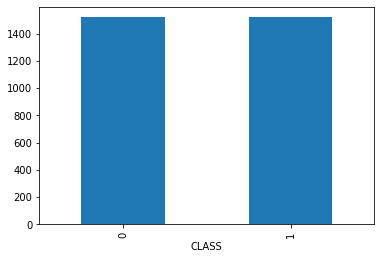

In [10]:
train_data.groupby('CLASS').size().plot(kind='bar')  

From the outputs above we can see that our data is very balanced ie we have an equal number of True's (1) and False (0), hence no need to apply special treatment with methods like smote.

## Correlation between the features

Correlation is one of the most steps in understanding our data, especially when our data is a continous data which is the case with our case. This is can be very helpful especially during feature selection, since it will help us select features that are not very correlated to each other which could lead to an effect known as `MultiCollinearity effect`, where certian faetures have a high positive or negative correlation with the other which will mislead the the algorithm during the testing stage, this can also lead to overfitting our data.

Correlation refers to the process of understanding the relationship between the multiple features we have in our dataset.

Lets get a correlation of the different variables we have in our data. This will tell whether there are features that are highly dependant on the other, which might affect our model especially if Logistic or Linear regression is used which are not immune to correlation like Decision Trees. If any of the features is observed exhibiting such a pattern of high correlation, its advisable to remove such features or use Dimensionality Reduction techniques like Principle component Analysis.

In [11]:
train_data.corr(method='pearson')

,FULL_Charge,FULL_AcidicMolPerc,FULL_AURR980107,FULL_DAYM780201,FULL_GEOR030101,FULL_OOBM850104,NT_EFC195,AS_MeanAmphiMoment,AS_DAYM780201,AS_FUKS010112,CT_RACS820104,CLASS
FULL_Charge,1.000000,-0.612996,-0.490977,-0.434603,-0.058725,-0.283758,0.088068,0.355477,-0.365374,-0.090570,0.232929,0.534602
FULL_AcidicMolPerc,-0.612996,1.000000,0.794796,0.541481,0.115201,0.513344,-0.143168,-0.431590,0.449621,0.002334,-0.213543,-0.598816
FULL_AURR980107,-0.490977,0.794796,1.000000,0.548253,0.346139,0.462712,-0.169540,-0.426097,0.456260,0.032958,-0.403599,-0.584111
FULL_DAYM780201,-0.434603,0.541481,0.548253,1.000000,0.010118,0.334778,-0.090058,-0.408793,0.894191,0.055915,-0.326792,-0.554838
FULL_GEOR030101,-0.058725,0.115201,0.346139,0.010118,1.000000,0.319157,-0.230417,-0.160269,-0.029085,0.040480,-0.151935,-0.260470
FULL_OOBM850104,-0.283758,0.513344,0.462712,0.334778,0.319157,1.000000,-0.230561,-0.336297,0.275640,-0.452769,0.155304,-0.453287
NT_EFC195,0.088068,-0.143168,-0.169540,-0.090058,-0.230417,-0.230561,1.000000,0.178683,-0.036844,0.145924,0.080898,0.260702
AS_MeanAmphiMoment,0.355477,-0.431590,-0.426097,-0.408793,-0.160269,-0.336297,0.178683,1.000000,-0.322378,0.025580,0.171524,0.693552
AS_DAYM780201,-0.365374,0.449621,0.456260,0.894191,-0.029085,0.275640,-0.036844,-0.322378,1.000000,0.045562,-0.256060,-0.437168
AS_FUKS010112,-0.090570,0.002334,0.032958,0.055915,0.040480,-0.452769,0.145924,0.025580,0.045562,1.000000,-0.445284,0.033432


From the output above, we can see that some features have fairly large correlation values of up to 0.7, however a few have very strong correlation of close to 1.

However this output is not the best to interprete as we are having alot values. Lets transform this into a graphical output.

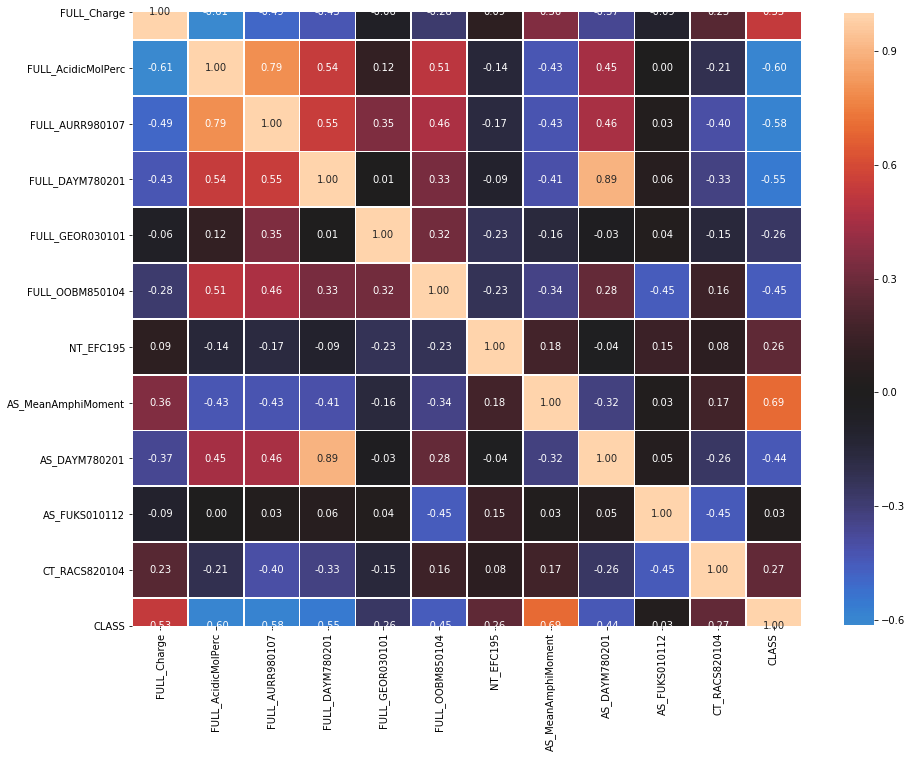

In [12]:
#defining a function to help me with the plotting 
def correlation_heatmap(train):   #will be taking the input data as an argument.
    correlations = train.corr(method='pearson') #compute the correlation values using the pearson method and store them to correlations

    fig, ax = plt.subplots(figsize=(15,15))  #Setting a canvas for the plot
    #Now making the actual plot with annotation set as True to see the actual values in the indivual subplots
    sns.heatmap(correlations, vmax=1.0, center=0, fmt='.2f',  
                square=True, linewidths=.7, annot=True, cbar_kws={"shrink": .75})  
    plt.show();  #making the actual plot defined above
    
correlation_heatmap(train_data) #Calling the function above with our train data


Lets check if we have the same pattern in our testing data set.

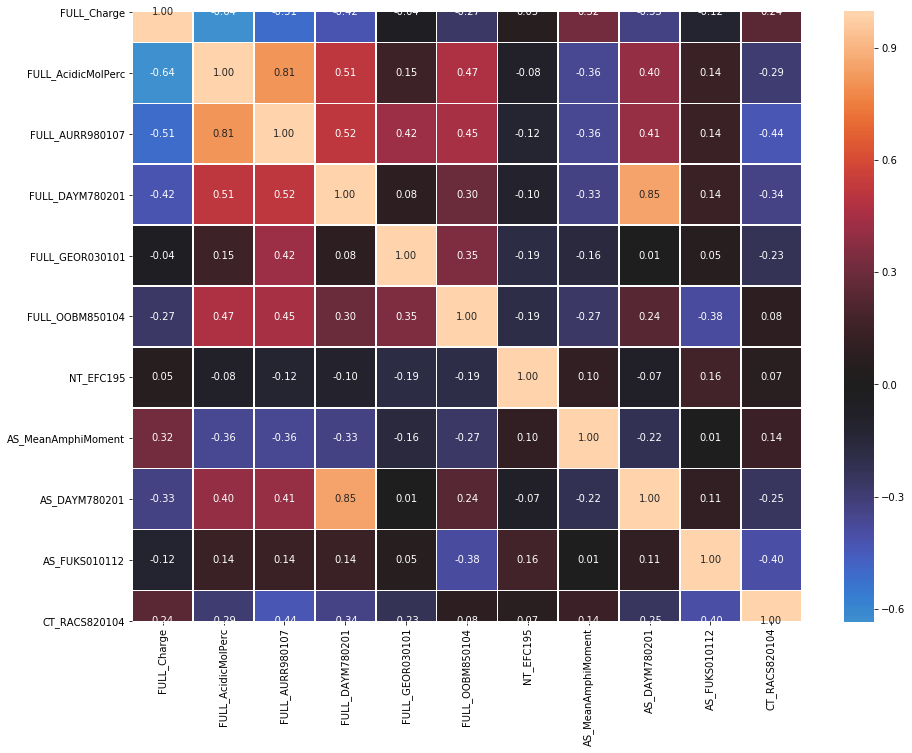

In [13]:
#Callling the function defined above on our test data
correlation_heatmap(test_data)

Indeed we can see that both the `train` and `test` datasets have fairly the same patterns of correlation between the features. This is good because the same treatment we apply on the train data will be expected to work fot the testing data and still we won't expect our algorithm performing better on train data and failing on the test data.

In close observation of the output above, we can see that a few of the feature have a very strong correlation such as **`FULL_DAYM780201`** and **`AS_DAYM780201`** which have a correlation of close of close to `0.9` which is very strong. From this is expect methods such as `Logistic Regression` not to perform to the best as expected unless i apply a PCA dimensionality reduction or removing one of them. 

This wil be more explored below in the Logistic Regression algorithm training and testing step to explore the effects.

Lets now check the correlation in relation with the outcome of interest. This is to check whether there is any feature that is highly correlated with the outcome of interest.

In [14]:
train_data.corr(method="pearson")['CLASS']

FULL_Charge           0.534602
FULL_AcidicMolPerc   -0.598816
FULL_AURR980107      -0.584111
FULL_DAYM780201      -0.554838
FULL_GEOR030101      -0.260470
FULL_OOBM850104      -0.453287
NT_EFC195             0.260702
AS_MeanAmphiMoment    0.693552
AS_DAYM780201        -0.437168
AS_FUKS010112         0.033432
CT_RACS820104         0.267652
CLASS                 1.000000
Name: CLASS, dtype: float64

From this, **AS_MeanAmphiMoment** has kinda of a strong correlation with the outcome of interest though not too much of a strong association. This might be one of the features we shall use when selecting our features to use, since it shows that the outcome highly depends it on hance might give a stronger score to the prediction accuracy.

## Exploring the data with more plots

Lets generate some plots that will get us a firm understading of our data. This is done with histogram, density plots and box plots
The considered must have plots include;
- Box and Whisker plots
- Line Graphs 
- Histogram plots
- Pairwise scatter plots


### To check Outliers

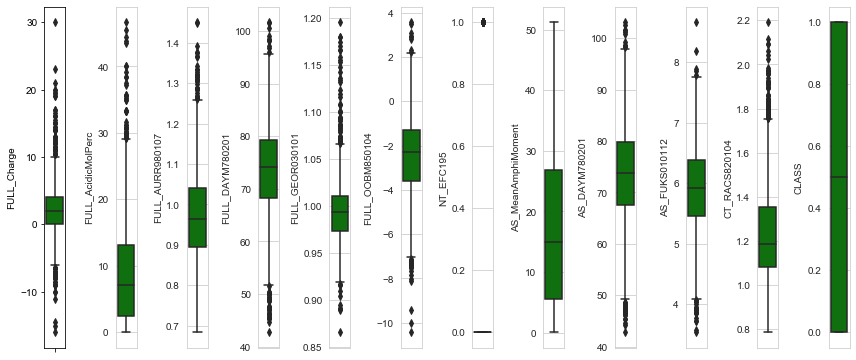

In [15]:
l = train_data.columns.values
number_of_columns=12
number_of_rows = len(l)-1/number_of_columns
plt.figure(figsize=(number_of_columns,5*number_of_rows))
for i in range(0,len(l)):
    plt.subplot(number_of_rows + 1,number_of_columns,i+1)
    sns.set_style('whitegrid')
    sns.boxplot(train_data[l[i]],color='green',orient='v')
    plt.tight_layout()

We can see from this plot that we do have some outliers in our data. 

### To check distribution-Skewness

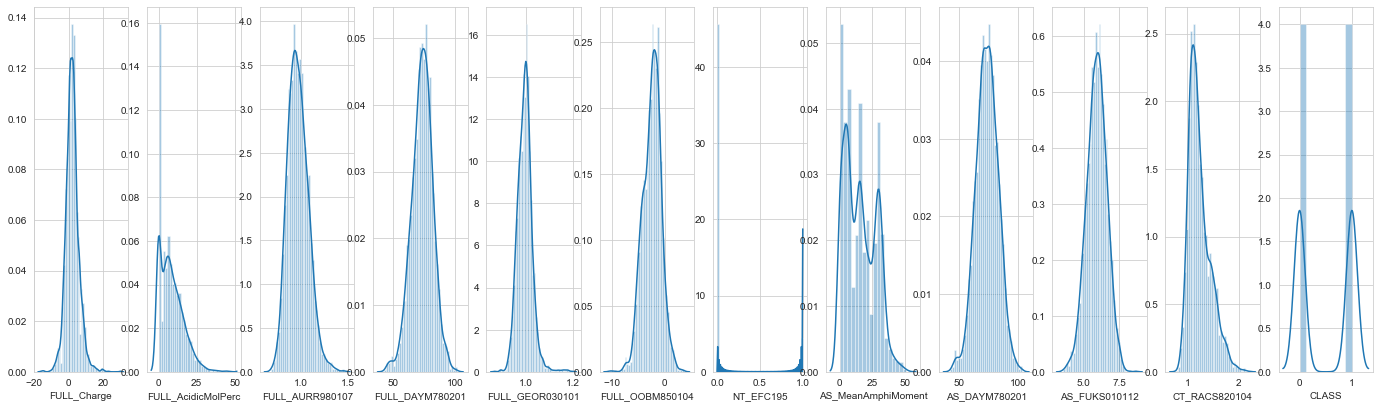

In [16]:
plt.figure(figsize=(2*number_of_columns,8*number_of_rows))
for i in range(0,len(l)):
    plt.subplot(number_of_rows + 1,number_of_columns,i+1)
    sns.distplot(train_data[l[i]],kde=True) 
    

From the graphs above, we can see that most of the features are normally distributed, with exceptions of a few such as `FULL_AcidicMolPerc` and `AS_MeanAmphiMoment`. Skewness means that within our we have some features that are fairly deviating from the mean data points.

If most of the data is skewed we might need to tranform it to assume a Gaussian distribution.

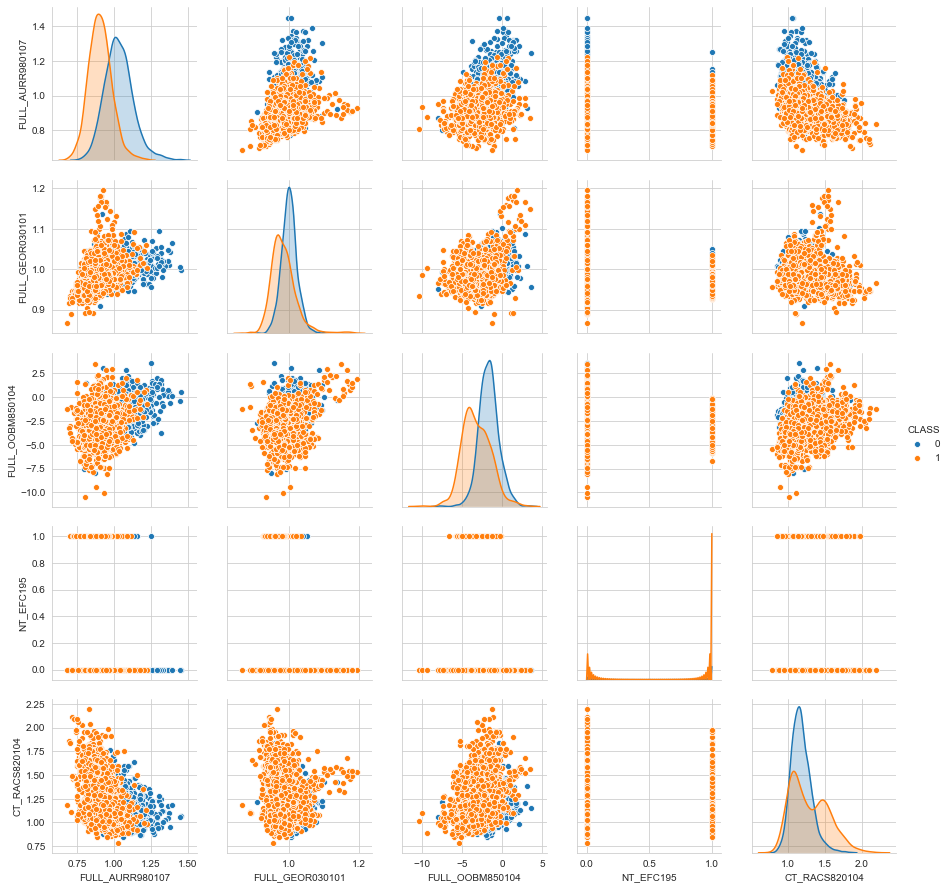

In [17]:
# Plots for 5 selected features as generated by Recursive Feature Elimination method. 
sns.pairplot(data=train_data, vars=['FULL_AURR980107', 'FULL_GEOR030101', 'FULL_OOBM850104', 'NT_EFC195',
       'CT_RACS820104'], hue="CLASS") 

### Plotting for null values
Lets first confirm if we do not have any null value in our dataset. This will correspond to a missing observation. These if left in will greatly affect the performance of our model. 
In case we have any we shall be interested in either removing them or imputing them with anotehr value such as the mode or the mean.

In [18]:
# Counting null values
train_data.isnull().sum()

FULL_Charge           0
FULL_AcidicMolPerc    0
FULL_AURR980107       0
FULL_DAYM780201       0
FULL_GEOR030101       0
FULL_OOBM850104       0
NT_EFC195             0
AS_MeanAmphiMoment    0
AS_DAYM780201         0
AS_FUKS010112         0
CT_RACS820104         0
CLASS                 0
dtype: int64

According to the output above, we don't have any count for a missing value in our data. Lets confirm this with a plot.

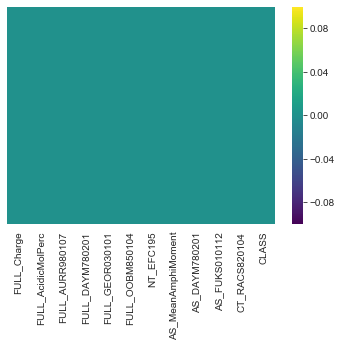

In [19]:
sns.heatmap(train_data.isnull(), yticklabels=False, cmap='viridis')

Indeed from this graph output, we can see that we don't have any missing values in our data. This is actually what we wanted, hence no need to impute any values. 

In case we had any missing data or NAs, then we could use the `train_data.dropna(inplace=True)` to remove any observation having a missing values in case thats what we wanted.


## Preparing data for ML
This is very important because various algorithms make assumptions of our data being passed into it. It for this reason that we must as well prepare our data in a such a way to best expose the problem to the ML algorithm we are going to use.

Options for Preprocessing include;
- Rescaling using sklearn's MinMaxScaler()
- Standardizing using sklearn's StandardScaler()
- Normalizing the data using sklearn's Normalizer()
- Binarizing the data/feature using sklearn's Binarizer with a threshold.

### i. Rescaling the data
This is done on the data when values have different scale, rescaling is done on the data to get it within a single range of values say 0 - 1.

This done with sklearn's **MinMaxScaler**.

In [20]:
# Rescale data (between 0 and 1)
import scipy
import numpy as np
from sklearn.preprocessing import MinMaxScaler

array = train_data.values  #getting only values of the features
X = array[:,0:11]  #extracting out the input data
Y = array[:,11]   #extracting the output feature
scaler = MinMaxScaler(feature_range=(0, 1))  #defining scaler to be used with our range (0-1)
rescaled_X = scaler.fit_transform(X)  #Transforming the data using the scaler
# summarizing the transformed data
np.set_printoptions(precision=3)
print(rescaled_X[0:5,:]) #printing out the output. Its now in a range of 0 - 1

[[0.457 0.    0.348 0.545 0.33  0.483 0.    0.005 0.508 0.415 0.182]
 [0.435 0.116 0.322 0.489 0.276 0.458 1.    0.011 0.421 0.586 0.475]
 [0.467 0.116 0.246 0.523 0.288 0.565 0.    0.011 0.442 0.273 0.666]
 [0.457 0.089 0.275 0.399 0.403 0.647 0.    0.011 0.405 0.153 0.424]
 [0.511 0.183 0.323 0.373 0.342 0.595 0.    0.011 0.5   0.196 0.536]]


The rescaled data printed above is now having values between 0 and 1

### ii. Standardizing the Data

This involves transforming features with a Gaussian distribution and differing means and standard deviations to a standard Gaussian distribution (ie mean of 0 and standard deviation of 1).  This is especially needed for models that assume a Gaussian distribution such as **Linear Regression, Logistic Regression, LDA**, etc 

Standardizing of data is done using scikit-learn's  `StandardScaler` class.

In [21]:
# Standardize data (0 mean, 1 stdev)
from sklearn.preprocessing import StandardScaler
array = train_data.values  #getting only values of the features
X = array[:,0:11]  #extracting out the input data
Y = array[:,11]    #extracting the output feature

scaler = StandardScaler().fit(X)
rescaledX = scaler.transform(X)
# summarize transformed data
np.set_printoptions(precision=3)
rescaledX[0:5,:]


array([[ 7.697e-01, -1.123e+00, -1.900e-01,  1.376e-01, -6.067e-01,
        -7.206e-01, -3.117e-01, -1.331e+00, -2.257e-02, -3.610e-01,
        -9.251e-01],
       [ 5.079e-01, -4.109e-01, -3.763e-01, -2.432e-01, -1.181e+00,
        -9.245e-01,  3.208e+00, -1.303e+00, -5.924e-01,  9.021e-01,
         1.037e+00],
       [ 9.006e-01, -4.109e-01, -9.163e-01, -8.651e-03, -1.054e+00,
        -4.632e-02, -3.117e-01, -1.304e+00, -4.590e-01, -1.409e+00,
         2.318e+00],
       [ 7.697e-01, -5.741e-01, -7.115e-01, -8.701e-01,  1.594e-01,
         6.274e-01, -3.117e-01, -1.302e+00, -7.015e-01, -2.300e+00,
         6.989e-01],
       [ 1.424e+00,  2.041e-03, -3.670e-01, -1.050e+00, -4.790e-01,
         2.003e-01, -3.117e-01, -1.302e+00, -7.713e-02, -1.977e+00,
         1.447e+00]])

### iii. Normalize Data
Normalizing in scikit-learn refers to rescaling each observation (row) to have a length of 1 (called a unit norm in linear algebra).
This is much used when we have data that has alot zeros with attributes of varying scales, especially when its going to be used with an algorithm that weighs input values such as neural networks and algorithms that use K-Nearest Neighbour. 

Normaliizing is done using scikit-learn's `Normalizer` class.

In [22]:
from sklearn.preprocessing import Normalizer
array = train_data.values  #getting only values of the features
X = array[:,0:11]  #extracting out the input data
Y = array[:,11]    #extracting the output feature

scaler = Normalizer().fit(X)  #Defining the normalizer
normalizedX = scaler.transform(X) #Calling the normalizer on our dataset.
# summarizing transformed data
np.set_printoptions(precision=3)
normalizedX[0:5,:]

array([[ 0.048,  0.   ,  0.009,  0.711,  0.009, -0.035,  0.   ,  0.003,
         0.698,  0.054,  0.01 ],
       [ 0.04 ,  0.054,  0.009,  0.72 ,  0.01 , -0.04 ,  0.01 ,  0.006,
         0.686,  0.066,  0.015],
       [ 0.054,  0.053,  0.009,  0.724,  0.009, -0.025,  0.   ,  0.006,
         0.683,  0.049,  0.017],
       [ 0.053,  0.044,  0.009,  0.699,  0.011, -0.014,  0.   ,  0.006,
         0.71 ,  0.046,  0.015],
       [ 0.076,  0.087,  0.009,  0.658,  0.01 , -0.021,  0.   ,  0.006,
         0.742,  0.046,  0.016]])

### iv.Binarizing Data
This refers to converting the data into a binary format where we set a threshold, and any entry above it is assigned a 1 whereas anyvalue below it is asigned a zero.

This is important especially during feature engeneering, which is the process of using domain knowledge to extract features from raw data via data mining techniques; which features could afterwards be used to improve the accuracy of the model being used.


In [23]:
# binarization
from sklearn.preprocessing import Binarizer
array = train_data.values  #getting only values of the features
X = array[:,0:11]  #extracting out the input data
Y = array[:,11]    #extracting the output feature

binarizer = Binarizer(threshold=0.0).fit(X) #Defining the standardizer 
binaryX = binarizer.transform(X)  #Applying the binarizer to transform my data
# summarize transformed data
np.set_printoptions(precision=3)
print(binaryX[0:5,:]) #Output is now a either zero or 1.

[[1. 0. 1. 1. 1. 0. 0. 1. 1. 1. 1.]
 [1. 1. 1. 1. 1. 0. 1. 1. 1. 1. 1.]
 [1. 1. 1. 1. 1. 0. 0. 1. 1. 1. 1.]
 [1. 1. 1. 1. 1. 0. 0. 1. 1. 1. 1.]
 [1. 1. 1. 1. 1. 0. 0. 1. 1. 1. 1.]]


**`Note`** Transforming methods of Binarixing, Normalizing, Standardizing were just tried out for learning and practice purposes, but will not be  used any where in my subsquent stages of the pipeline as they are not very really applicable to my current problem to be answered. 

Only Rescaling in this case is applicable as i have negative values in my dataset, hence a need to transform them between 0 and 1

# Feature Selection
This involves selecting features that are very relevant to our predictions. This is because including features that are irrelevant or partially relevant has a negative impact on the performance of our model especially on linear models such as Linear and Logistic Regression.

Benefits of Feature selection are;
- Improves accuracy
- Reduces Training time
- Reduces overfitting

Feature selection algorithms are generally grouped into 3 broad categories ie;   

i) **Filter methods**    
These often apply statistical scores to the different features, after which features are graded basing on their scores assigned to them. Examples of such methods include `chi-square`, `information gain` and `correlation coeficient scores`.

ii) **Wrapper Methods**    
These methods usually choose a group of features from the dataset and evaluate the accuracy of the model using the features chosen. A score is given to this group and after a new group is chosen to the evaluated. An example of such a method is `Recursive Feature Elimination`.
    
iii) **Embedded methods**        
Embedded methods learn which features best contribute to the accuracy of the model while the model is being created. The most common type of embedded feature selection methods are `regularization` methods.

Methods for feature selection i will try out include;
1. Univariate Selection.
- Recursive Feature Selection
- Principle Component Analysis
- Feature Importance

### a. Univariate selection
This method employs the chi-square goodness of fit to assign scores to each feature. 
However running this method on the original dataset returns an error **`ValueError: Input X must be non-negative.`** which ideally means it can be employed on a negative value of which case i have negative values in my original dataset.

For this case i employed the rescaled version of the dataset from the MinMaxScaler named as `rescaled_X`. 

In [27]:
from sklearn.feature_selection import SelectKBest  #for extracting the best features
from sklearn.feature_selection import chi2  #for scoring the features

array = train_data.values  #extracting the values only from the dataset
X = array[:,0:11]  #extracting the input data
Y = array[:,11]  #extracting the output data

# feature extraction
test = SelectKBest(score_func=chi2, k=4) 
fit = test.fit(rescaled_X, Y)

# summarize scores
np.set_printoptions(precision=3)
print(fit.scores_)
features = fit.transform(rescaled_X)
# summary of the selected features
print(features[0:5,:])

[1.525e+01 1.576e+02 5.423e+01 3.731e+01 4.789e+00 1.623e+01 1.882e+02
 2.442e+02 2.616e+01 1.339e-01 1.515e+01]
[[0.    0.348 0.    0.005]
 [0.116 0.322 1.    0.011]
 [0.116 0.246 0.    0.011]
 [0.089 0.275 0.    0.011]
 [0.183 0.323 0.    0.011]]


## b. Recursive Feature Elimination
This works by removing one feature a time and then evaluate the accuracy of the model using the remaining features. It employs Logistic Regression to compute the accuracy. 
A subgroup of the features combination that gives the highest accuracy are selected.

In [28]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression

array_2 = train_data.values  #extracting the values only from the dataset
X = array_2[:,0:11]  #extracting the input data
Y = array_2[:,11]  #extracting the output data

# feature extraction
model = LogisticRegression()  #defining the model for accuracy detection
rfe = RFE(model, 7)  #Applying the model so as to get the best 7 features 
fit = rfe.fit(X, Y)  #assessing the perfomance of the selected features
print("Num Features: ",  fit.n_features_)  #print number of features extracting
print("Selected Features:",  fit.support_)  #prints a list of logicals of the best features selected
print("Feature Ranking: ",  fit.ranking_)   #A list of the rankings of the different features


tr = X[:,fit.support_]
col = train_data.columns[0:11]  #extracting only the column names of the dataset to know the actual names of the selected features
col[fit.support_] #Get the best features by actual names

Num Features:  7
Selected Features: [ True False  True False  True  True  True  True False False  True]
Feature Ranking:  [1 4 1 3 1 1 1 1 5 2 1]


Index(['FULL_Charge', 'FULL_AURR980107', 'FULL_GEOR030101', 'FULL_OOBM850104',
       'NT_EFC195', 'AS_MeanAmphiMoment', 'CT_RACS820104'],
      dtype='object')

For this assignment i will use features returned by this method. 

## c. Principal Component Analysis
This operates by applying a data reduction technique by collapsing/transforming  the data features into a given number of principal components. The best principal compnents that share the lowest reemblance with the original data are returned.    
This is implemented using scikit-learn's `PCA`.

In [29]:
from sklearn.decomposition import PCA

#splitting data into input and output
array_3 = train_data.values
X = array_3[:,0:11]
Y = array_3[:,11]

pca = PCA(n_components=3) #feature extraction with PCA
fit = pca.fit(X)
# summarize components
print("Explained Variance: " , fit.explained_variance_ratio_) 
print(fit.components_)


Explained Variance:  [0.605 0.242 0.103]
[[ 1.409e-01 -3.557e-01 -4.743e-03 -4.935e-01 -1.975e-04 -5.101e-02
   2.877e-03  6.020e-01 -4.950e-01 -8.765e-04  4.186e-03]
 [-8.867e-03  3.090e-02  4.994e-04  3.921e-01 -5.282e-04 -8.492e-03
   3.437e-03  7.629e-01  5.129e-01  5.018e-03 -2.000e-03]
 [-2.731e-01  8.713e-01  8.049e-03 -1.349e-01  4.214e-04  8.143e-02
  -2.941e-03  2.312e-01 -2.966e-01 -1.359e-03 -5.700e-04]]


We can observe from the above output that 3 Principal Components returned have little resemblance to the source data.


## d. Feature Importance
This uses Decision Trees to determine the importance of each feature. A rank of the importance of each feature is returned.

In [30]:
from sklearn.ensemble import ExtraTreesClassifier

#splitting data into input and output
array_4 = train_data.values
X = array_4[:,0:11]
Y = array_4[:,11]

# feature extraction
model = ExtraTreesClassifier() #defining my model
model.fit(X, Y)  #fiting the data with the model
print(model.feature_importances_)  #a list of the ranks for each feature

[0.137 0.128 0.047 0.096 0.063 0.072 0.032 0.265 0.063 0.034 0.063]


# Evaluating Machine Learning Algorithms
There are 4 metrics that i will try out to assess the accuracy of my algotithm.     
These include;
- Train and Test Sets.
- k-fold Cross Validation.
- Leave One Out Cross Validation.
- Repeated Random Test-Train Splits.

### 1. Train and Test
This involved splitting the input data into a training set and testing set, where the algorithm will be first training on the training portion and its performance evaluated on the testing set.

In [31]:
from sklearn.model_selection import train_test_split  #for splitting the data
from sklearn.linear_model import LogisticRegression  #for making prediction and assessing the accuracy

#Splitting the data into the input and output component
array = train_data.values
X = array[:,0:11]
Y = array[:,11]

test_size = 0.33  #split data training portion = 67% and Testing portion = 33%
seed = np.random.seed(42)  #setting seed for reproducibility on other machines

#Splitting the data
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=test_size, random_state=seed)

model = LogisticRegression()  #defining the model

model.fit(X_train, Y_train)  #Fitting the model to the data
result = model.score(X_test, Y_test)  #scoring the performance of the model using known output
print("Accuracy of LR on the data is: ",  (result*100.0))

Accuracy of LR on the data is:  91.52542372881356


I would be interested in knowing whether increasing or the size of the training set has an effect on the accuracy of the data. Though a 67 x 33 splitting proportion is usually recommended, in the code below i will be trying a 59 X 41 proportion and see the effect.

In [32]:
#Increasing the testing data set to 0.41

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import matthews_corrcoef  #Adding the mcc as a metric for determining accuracy

array = train_data.values
X = array[:,0:11]
Y = array[:,11]
test_size1 = 0.41
seed = np.random.seed(42)  #setting seed for reproducibility on other machines

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=test_size1,
random_state=seed)
model = LogisticRegression()
model.fit(X_train, Y_train)
result = model.score(X_test, Y_test)

print("Accuracy: ",  (result*100.0))

#model.fit(X,Y)
out = model.predict(test_data)

mcc = matthews_corrcoef(model.predict(X),Y)
print("MCC score is: ", mcc)


Accuracy:  91.41252006420547
MCC score is:  0.8316764343349675


It turns out that slightly increasing the testing set to somehting like 41% will slightly increase the performance of an algorithm by like 2%, however reducing the size below 30% or over increasing it beyond 45% will siginificantly drop the performance of the algorithm.

Next i will be interested in determining whether only using the features returned by the feature selection will improve the performance of the model.

In [33]:
#extracting out only the best 7 features the RFE an dstoring it into new
new = train_data[['FULL_Charge', 'FULL_AURR980107', 'FULL_GEOR030101', 'FULL_OOBM850104',
       'NT_EFC195', 'AS_MeanAmphiMoment', 'CT_RACS820104','CLASS']]

In [34]:
#Using selected features

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

array = new.values
X = array[:,0:7]
Y = array[:,7]
test_size = 0.40
seed = np.random.seed(42)  #setting seed for reproducibility on other machines

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=test_size,
random_state=seed)
model = LogisticRegression()
model.fit(X_train, Y_train)
result = model.score(X_test, Y_test)
print("Accuracy: ",  (result*100.0))


Accuracy:  89.47368421052632


It turns out that Reducing the number of features will instead drop the accuracy of my model.

### 2. K-Fold validation
Here the data the input data is split into k-fold subsets, where the model goes through multiple training and testing stages so that atleast each fold has a chance to be used for testing and training. 

This is considered as more accurate and a standard method than the test_split method as it takes into account the different subportion of the data that could bias the algorithm with a single train and test.

In [35]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

array = train_data.values
X = array[:,0:11]
Y = array[:,11]

num_folds = 10 #number of folds to use
seed = np.random.seed(42)  #setting seed for reproducibility on other machines

kfold = KFold(n_splits=num_folds, random_state=seed)
model = LogisticRegression()
results = cross_val_score(model, X, Y, cv=kfold)

print(f"Accuracy:", (results.mean()*100.0, results.std()*100.0))

Accuracy: (83.63470557582075, 27.1811965862896)


## Algorithm Evaluation Metrics

The following are the common classsification metrics used;
- Classiffication Accuracy.
- Logarithmic Loss.
- Area Under ROC Curve.
- Confusion Matrix.
- Classiffication Report.

### Classification Accuracy
This is the ratio of the number of correct predictions to the total predictions.
Its more suitably used when there is an equal number of observations in each class.


In [36]:
array = train_data.values
X = array[:,0:11]
Y = array[:,11]

kfold = KFold(n_splits=10, random_state=7)

model = LogisticRegression()

scoring = 'accuracy'

results = cross_val_score(model, X, Y, cv=kfold, scoring=scoring)
print("Accuracy:", (results.mean(), results.std()))

Accuracy: (0.8363470557582074, 0.271811965862896)


### Confusion Matrix
This si used to give the a report of the counts of the True positive predictions, True Negative as well as False positive and False Negative.

In [110]:
from sklearn.metrics import confusion_matrix

array = train_data.values
X = array[:,0:11]
Y = array[:,11]
test_size = 0.33
seed = 7
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=test_size,
random_state=seed)

model = LogisticRegression()
model.fit(X_train, Y_train)

predicted = model.predict(X_test)
matrix = confusion_matrix(Y_test, predicted)
print(matrix)

[[458  41]
 [ 41 463]]


From the report above, we can see that the alogrithm was able to accurately predict (458 + 463) outcomes however misclassified (41 + 41) outcomes. 

### Classiffication Report

In [38]:
from sklearn.metrics import classification_report

array = train_data.values
X = array[:,0:11]
Y = array[:,11]
test_size = 0.33
seed = 7
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=test_size,
random_state=seed)
model = LogisticRegression()
model.fit(X_train, Y_train)
predicted = model.predict(X_test)
report = classification_report(Y_test, predicted)
print(report)

              precision    recall  f1-score   support

         0.0       0.92      0.92      0.92       499
         1.0       0.92      0.92      0.92       504

    accuracy                           0.92      1003
   macro avg       0.92      0.92      0.92      1003
weighted avg       0.92      0.92      0.92      1003



# PREDICTION OF OUTCOME 

Predictions wil be made using 11 different algorithms for which in every case the accuracy of the different algorithms will be evelauted as well their predictions submitted on kaggle to get thier MCC score.
Since in our case the predicted outcome takes on only 2 values ( ie 1 or 0) this considered as classification problem.

Algotrithms to be used are;
1. Logistic Regression
- Gaussian Naive Bayes
- LinearDiscriminantAnalysis
- K-Nearest Neigbhour
- Classification And Decision Trees (CART)
- Support Vector Machines
- Random Forests
- AdaBoost
- Stochastic Gradient Boosting 
- Stochastic X Gradient Boosting, XGB
- Voting Ensemble

## 1. Logistic Regression
Logistic regression is one the commonest algorithms used to predicting classification problems as it returns a discrete outcome. The accuracy of the predictiion will be assessed using Matthews Correlation Coefficient since the same metrics will be used on kaggle to assess my submission.

In [114]:
#Logistic Regression prediction
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import matthews_corrcoef
from sklearn.metrics import confusion_matrix

array_2 = train_data.values  #extracting the values only from the dataset
X = array_2[:,0:11]  #extracting the input data
Y = array_2[:,11]  #extracting the output data

model = LogisticRegression() #defining the used model

num_folds = 10  #numbers of folds used
seed = np.random.seed(42)  #setting a seed for reproducibility
kfold = KFold(n_splits=num_folds, random_state=seed, shuffle=True)  #Splitting the data into 10 folds
scoring = "accuracy"  #defining my scoring metric as accuracy
results = cross_val_score(model, X, Y, cv=kfold, scoring=scoring) #. storing results from each validation round into results
print("Accuracy is: %s with a standard deviation of %s" % (results.mean()*100,results.std()*100)) 

model.fit(X,Y)  #fitting input data with outcome

mcc = matthews_corrcoef(model.predict(X),Y) #computing MCC for the model
print("MCC accuracy is: ", mcc)

#A confussion Matrix 
predicted = model.predict(X_test)
matrix = confusion_matrix(Y_test, predicted)
print('The confusion matrix is:   \n',matrix)

out = model.predict(test_data)  #predicting outcome on the test_data and storing it into out

#Storing output to a csv file 
result = pd.DataFrame(out)  #convert the numpy object to a pandas DataFrame
result.columns = ["CLASS"]  #Adding columns names
result.index.name = "Index"

result['CLASS'] = result['CLASS'].map({0.0:False, 1.0:True}) #converting 0 False and 1 as True as the required output
print(result.head())  #sample output
result.to_csv('/Users/kakembo/Desktop/OutMetrics/logistic_out.csv') #saving output to a csv file.

#.    This gave me an mcc score on kaggle of   0.8328 

Accuracy is: 91.6065224943547 with a standard deviation of 1.3888813627806003
MCC accuracy is:  0.8316526340707017
The confusion matrix is:   
 [[463  36]
 [ 44 460]]
       CLASS
Index       
0      False
1      False
2       True
3       True
4      False


Logistic Regression has an accuracy 91.61 and an MCC of 0.832, and on viewing this performance with a confusion matrix, i see that (463 + 460) were correctly predicted, while (44 + 36) were falsely predicted.

Logistic Regression on the actual prediction gave me an MCC score of 0.832.

## 2. Gaussian Naive Bayes
This is also another algorithm reported to perform very well on classification problems.
It employs a Bayesian approach in learning patterns in the data as well as making predictions.

In [118]:
#GaussionNB  ie Naive Bayes
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import matthews_corrcoef

array_2 = train_data.values  #extracting the values only from the dataset
X = array_2[:,0:11]  #extracting the input data
Y = array_2[:,11]  #extracting the output data

model = GaussianNB() #defining the used model

num_folds = 10  #numbers of folds used
seed = np.random.seed(42)  #setting a seed for reproducibility
kfold = KFold(n_splits=num_folds, random_state=seed, shuffle=True)  #Splitting the data into 10 folds
scoring = "accuracy"  #defining my scoring metric as accuracy
results = cross_val_score(model, X, Y, cv=kfold, scoring=scoring) #. storing results from each validation round into results
print("Accuracy is: %s with a standard deviation of %s" % (results.mean()*100,results.std()*100)) 

model.fit(X,Y)  #fitting input data with outcome

mcc = matthews_corrcoef(model.predict(X),Y) #computing MCC for the model
print("MCC accuracy is: ", mcc)

predNB = model.predict(test_data)  #predicting outcome on the test_data and storing it into out

#Storing output to a csv file 
resultNB = pd.DataFrame(predNB)  #convert the numpy object to a pandas DataFrame
resultNB.columns = ["CLASS"]  #Adding columns names
resultNB.index.name = "Index"

resultNB['CLASS'] = resultNB['CLASS'].map({0.0:False, 1.0:True})  #converting 0 False and 1 as True as the required output
print(resultNB.head())  #sample output
#  resultNB.to_csv('/Users/kakembo/Desktop/OutMetrics/GaussionNB_out.csv')   #saving output to a csv file.

#.    This gave me a score of   0.99559

Accuracy is: 91.93622980719125 with a standard deviation of 1.6401530202739358
MCC accuracy is:  0.8407203694376205
       CLASS
Index       
0       True
1       True
2       True
3       True
4      False


The prediction by the GaussianNB gave me a prediction accuracy of 0.99559 on Kaggle using all the features. This is very high compared to the output i had from the Logistic Regression.

Let me try applying only the 5 features selected during the feature selection using the RFE to see if our performance improves in any way.

In [44]:
#GaussionNB  using a selected features 
from sklearn.naive_bayes import GaussianNB

dataset = train_data[['FULL_AURR980107', 'FULL_GEOR030101', 'FULL_OOBM850104', 'NT_EFC195',
       'CT_RACS820104', 'CLASS']]
array = dataset.values
X = array[:,0:5]
Y = array[:,5]
kfold = KFold(n_splits=10, random_state=7)
model = GaussianNB()
results = cross_val_score(model, X, Y, cv=kfold)
print(results.mean())

from sklearn.metrics import matthews_corrcoef
model.fit(X,Y)
mcc = matthews_corrcoef(model.predict(X), Y)
print("MCC for NB is: ", mcc)

predNB = model.predict(test_data[['FULL_AURR980107', 'FULL_GEOR030101', 'FULL_OOBM850104', 'NT_EFC195',
       'CT_RACS820104']])

#Converting the output to a csv file output
resultNB = pd.DataFrame(predNB)
resultNB.columns = ["CLASS"]
resultNB.index.name = "Index"

resultNB['CLASS'] = resultNB['CLASS'].map({0.0:False, 1.0:True})
print(resultNB.head())
print(resultNB["CLASS"].unique())
#resultNB.to_csv('/Users/kakembo/Desktop/OutMetrics/GaussionNB_RFE-5.csv')
#.    This gave me a score of   0.74760

0.8075028226506861
MCC for NB is:  0.6505452702192815
       CLASS
Index       
0       True
1       True
2       True
3       True
4      False
[ True False]


It turns out that Reducing my features to 5 best features as determined by RFE method during feature selection greatly reduced the accuracy of my prediction to `0.74760` on Kaggle submission.    
I then increased my features to 8, and then the performance increased to `0.90074` on the kaggle submssion.

Increasing the features further to 10 improved my prediction accuracy to `0.95593`.

From this i can conclude that for this dataset its preferred to use the entire dataset without applying any feature selection as removing any feature from the dataset will lead to a drop in the accuracy of my model predictions. 

## 3. LinearDiscriminantAnalysis

In [50]:
# Trying out LinearDiscriminantAnalysis
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.metrics import matthews_corrcoef

array_2 = train_data.values  #extracting the values only from the dataset
X = array_2[:,0:11]  #extracting the input data
Y = array_2[:,11]  #extracting the output data

model = LinearDiscriminantAnalysis() #defining the used model

num_folds = 10  #numbers of folds used
seed = np.random.seed(42)  #setting a seed for reproducibility
kfold = KFold(n_splits=num_folds, random_state=seed, shuffle=True)  #Splitting the data into 10 folds
scoring = "accuracy"  #defining my scoring metric as accuracy
results = cross_val_score(model, tr, Y, cv=kfold, scoring=scoring) # storing results from each validation round into results
print("Accuracy is: %s with a standard deviation of %s" % (results.mean()*100,results.std()*100)) 

model.fit(X,Y)  #fitting input data with outcome

mcc = matthews_corrcoef(model.predict(X),Y) #computing MCC for the model
print("MCC accuracy is: ", mcc)

predLDA = model.predict(test_data)  #predicting outcome on the test_data and storing it into out

#Storing output to a csv file 
resultLDA = pd.DataFrame(predLDA)  #convert the numpy object to a pandas DataFrame
resultLDA.columns = ["CLASS"]  #Adding columns names
resultLDA.index.name = "Index"

resultLDA['CLASS'] = resultLDA['CLASS'].map({0.0:False, 1.0:True})  #converting 0 False and 1 as True as the required output
print(resultLDA.head())  #sample output
#resultLDA.to_csv('/Users/kakembo/Desktop/OutMetrics/LDA_out.csv')   #saving output to a csv file.


Accuracy is: 90.45498957790518 with a standard deviation of 1.3436057312261347
MCC accuracy is:  0.8377162908048379
       CLASS
Index       
0      False
1       True
2       True
3      False
4      False


## 4. K-Nearest Neighbour


In [54]:
#  KNN
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import matthews_corrcoef

array = train_data.values  #extracting the values only from the dataset
X = array[:,0:11]  #extracting the input data
Y = array[:,11]  #extracting the output data

model = KNeighborsClassifier() #defining the used model

num_folds = 10  #numbers of folds used
seed = np.random.seed(42)  #setting a seed for reproducibility
kfold = KFold(n_splits=num_folds, random_state=seed, shuffle=True)  #Splitting the data into 10 folds
scoring = "accuracy"  #defining my scoring metric as accuracy
results = cross_val_score(model, tr, Y, cv=kfold, scoring=scoring) # storing results from each validation round into results
print("Accuracy is: %s with a standard deviation of %s" % (results.mean()*100,results.std()*100)) 

model.fit(X,Y)  #fitting input data with outcome

mcc = matthews_corrcoef(model.predict(X),Y) #computing MCC for the model using known results
print("MCC accuracy is: ", mcc)

predKNN = model.predict(test_data)  #predicting outcome on the test_data and storing it into out

#Storing output to a csv file 
resultKNN = pd.DataFrame(predKNN)  #convert the numpy object to a pandas DataFrame
resultKNN.columns = ["CLASS"]  #Adding columns names
resultKNN.index.name = "Index"

resultKNN['CLASS'] = resultKNN['CLASS'].map({0.0:False, 1.0:True})  #converting 0 False and 1 as True as the required output
print(resultKNN.head())  #sample output
resultKNN.to_csv('/Users/kakembo/Desktop/OutMetrics/KNN_out.csv')   #saving output to a csv file.


Accuracy is: 90.68449279138441 with a standard deviation of 1.7300074011300002
MCC accuracy is:  0.8690586462107053
       CLASS
Index       
0      False
1       True
2       True
3       True
4      False


## 5. Decision Trees (CART)

In [55]:
#Classifiction And Regression Trees. (CART)
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import matthews_corrcoef

array_2 = train_data.values  #extracting the values only from the dataset
X = array_2[:,0:11]  #extracting the input data
Y = array_2[:,11]  #extracting the output data

model = DecisionTreeClassifier() #defining the used model

num_folds = 10  #numbers of folds used
seed = np.random.seed(42)  #setting a seed for reproducibility
kfold = KFold(n_splits=num_folds, random_state=seed, shuffle=True)  #Splitting the data into 10 folds
scoring = "accuracy"  #defining my scoring metric as accuracy
results = cross_val_score(model, tr, Y, cv=kfold, scoring=scoring) # storing results from each validation round into results
print("Accuracy is: %s with a standard deviation of %s" % (results.mean()*100,results.std()*100)) 

model.fit(X,Y)  #fitting input data with outcome

mcc = matthews_corrcoef(model.predict(X),Y) #computing MCC for the model
print("MCC accuracy is: ", mcc)

predCART = model.predict(test_data)  #predicting outcome on the test_data and storing it into out

#Storing output to a csv file 
resultCART = pd.DataFrame(predCART)  #convert the numpy object to a pandas DataFrame
resultCART.columns = ["CLASS"]  #Adding columns names
resultCART.index.name = "Index"

resultCART['CLASS'] = resultCART['CLASS'].map({0.0:False, 1.0:True})  #converting 0 False and 1 as True as the required output
print(resultCART.head())  #sample output
resultCART.to_csv('/Users/kakembo/Desktop/OutMetrics/CART_out.csv')   #saving output to a csv file.


Accuracy is: 88.90687424005559 with a standard deviation of 1.640701962492025
MCC accuracy is:  1.0
       CLASS
Index       
0       True
1       True
2      False
3      False
4      False


## 6. Extra Trees


In [105]:
from sklearn.ensemble import ExtraTreesClassifier

array_2 = train_data.values  #extracting the values only from the dataset
X = array_2[:,0:11]  #extracting the input data
Y = array_2[:,11]  #extracting the output data

max_features = 3
num_trees = 1000
model = ExtraTreesClassifier(n_estimators=num_trees, max_features=max_features) #defining the used model

num_folds = 10  #numbers of folds used
seed = np.random.seed(42)  #setting a seed for reproducibility
kfold = KFold(n_splits=num_folds, random_state=seed, shuffle=True)  #Splitting the data into 10 folds
scoring = "accuracy"  #defining my scoring metric as accuracy
results = cross_val_score(model, X, Y, cv=kfold, scoring=scoring) #. storing results from each validation round into results
print("Accuracy is: %s with a standard deviation of %s" % (results.mean()*100,results.std()*100)) 

model.fit(X,Y)  #fitting input data with outcome

mcc = matthews_corrcoef(model.predict(X),Y) #computing MCC for the model
print("MCC accuracy is: ", mcc)

predET = model.predict(test_data)  #predicting outcome on the test_data and storing it into out

#Storing output to a csv file 
resultET = pd.DataFrame(predET)  #convert the numpy object to a pandas DataFrame
resultET.columns = ["CLASS"]  #Adding columns names
resultET.index.name = "Index"

resultET['CLASS'] = resultET['CLASS'].map({0.0:False, 1.0:True})  #converting 0 False and 1 as True as the required output
print(resultET.head())  #sample output
resultET.to_csv('/Users/kakembo/Desktop/OutMetrics/Extra_Tree_out.csv')   #saving output to a csv file.

#.    This gave me a score of   0.99559

Accuracy is: 93.87799635226679 with a standard deviation of 1.2323341253760978
MCC accuracy is:  1.0
       CLASS
Index       
0       True
1       True
2       True
3       True
4      False


## 7. Support Vector Machine, SVM

In [56]:
#Support Vector Machine,  SVM
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import matthews_corrcoef

array_2 = train_data.values  #extracting the values only from the dataset
X = array_2[:,0:11]  #extracting the input data
Y = array_2[:,11]  #extracting the output data

model = SVC() #defining the used model

num_folds = 10  #numbers of folds used
seed = np.random.seed(42)  #setting a seed for reproducibility
kfold = KFold(n_splits=num_folds, random_state=seed, shuffle=True)  #Splitting the data into 10 folds
scoring = "accuracy"  #defining my scoring metric as accuracy
results = cross_val_score(model, tr, Y, cv=kfold, scoring=scoring) # storing results from each validation round into results
print("Accuracy is: %s with a standard deviation of %s" % (results.mean()*100,results.std()*100)) 

model.fit(X,Y)  #fitting input data with outcome

mcc = matthews_corrcoef(model.predict(X),Y) #computing MCC for the model
print("MCC accuracy is: ", mcc)

predSVM = model.predict(test_data)  #predicting outcome on the test_data and storing it into out

#Storing output to a csv file 
resultSVM = pd.DataFrame(predSVM)  #convert the numpy object to a pandas DataFrame
resultSVM.columns = ["CLASS"]  #Adding columns names
resultSVM.index.name = "Index"

resultSVM['CLASS'] = resultSVM['CLASS'].map({0.0:False, 1.0:True})  #converting 0 False and 1 as True as the required output
print(resultSVM.head())  #sample output
resultSVM.to_csv('/Users/kakembo/Desktop/OutMetrics/SVM_out.csv')   #saving output to a csv file.

# This gave a score of 0.74461 on a kaggle submsion

Accuracy is: 91.57373632100052 with a standard deviation of 1.9906988239840162
MCC accuracy is:  0.9704865031499489
       CLASS
Index       
0       True
1       True
2       True
3       True
4      False


## 8. Random Forests

In [81]:
# Random Forest
from sklearn.ensemble import RandomForestClassifier

array = train_data.values  #extracting the values only from the dataset
X = array[:,0:11]  #extracting the input data
Y = array[:,11]  #extracting the output data

model = RandomForestClassifier() #defining the used model

num_folds = 10  #numbers of folds used
seed = np.random.seed(42)  #setting a seed for reproducibility
kfold = KFold(n_splits=num_folds, random_state=seed, shuffle=True)  #Splitting the data into 10 folds
scoring = "accuracy"  #defining my scoring metric as accuracy
results = cross_val_score(model, tr, Y, cv=kfold, scoring=scoring) # storing results from each validation round into results
print("Accuracy is: %s with a standard deviation of %s" % (results.mean()*100,results.std()*100)) 

model.fit(X,Y)  #fitting input data with outcome

mcc = matthews_corrcoef(model.predict(X),Y) #computing MCC for the model
print("MCC accuracy is: ", mcc)

pred_RForest = model.predict(test_data)  #predicting outcome on the test_data and storing it into out

#Storing output to a csv file 
result_RForest = pd.DataFrame(pred_RForest)  #convert the numpy object to a pandas DataFrame
result_RForest.columns = ["CLASS"]  #Adding columns names
result_RForest.index.name = "Index"

result_RForest['CLASS'] = result_RForest['CLASS'].map({0.0:False, 1.0:True})  #converting 0 False and 1 as True as the required output
print(result_RForest.head())  #sample output
result_RForest.to_csv('/Users/kakembo/Desktop/OutMetrics/RForest_out.csv')   #saving output to a csv file.

# This gave a score of 0.80492 on a kaggle submsion

Accuracy is: 92.26517717561231 with a standard deviation of 0.8309722046784965
MCC accuracy is:  0.9894881966653224
       CLASS
Index       
0       True
1       True
2       True
3       True
4      False


## 9. AdaBoost


In [58]:
# AdaBoost Classification
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import AdaBoostClassifier

array_2 = train_data.values  #extracting the values only from the dataset
X = array_2[:,0:11]  #extracting the input data
Y = array_2[:,11]  #extracting the output data

num_folds = 10  #numbers of folds used
seed = np.random.seed(42)  #setting a seed for reproducibility
num_trees = 30

kfold = KFold(n_splits=num_folds, random_state=seed)
model = AdaBoostClassifier(n_estimators=num_trees, random_state=seed)

results = cross_val_score(model, X, Y, cv=kfold)

print("Accuracy is: %s with a standard deviation of %s" % (results.mean()*100,results.std()*100)) 

model.fit(X,Y)  #fitting input data with outcome

mcc = matthews_corrcoef(model.predict(X),Y) #computing MCC for the model
print("MCC accuracy is: ", mcc)

predAda = model.predict(test_data)  #predicting outcome on the test_data and storing it into out

#Storing output to a csv file 
resultAda = pd.DataFrame(predAda)  #convert the numpy object to a pandas DataFrame
resultAda.columns = ["CLASS"]  #Adding columns names
resultAda.index.name = "Index"

resultAda['CLASS'] = resultAda['CLASS'].map({0.0:False, 1.0:True})  #converting 0 False and 1 as True as the required output
print(resultAda.head())  #sample output
resultAda.to_csv('/Users/kakembo/Desktop/OutMetrics/Ada_out.csv')   #saving output to a csv file.

# This gave a score of 0.79958 on a kaggle submsion

Accuracy is: 77.01895518499218 with a standard deviation of 29.02061682872751
MCC accuracy is:  0.8730261590913062
       CLASS
Index       
0       True
1       True
2      False
3       True
4      False


## 10. Stochastic Gradient Boosting

In [61]:
# Stochastic Gradient Boosting Classification
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import GradientBoostingClassifier

array = train_data.values  #extracting the values only from the dataset
X = array[:,0:11]  #extracting the input data
Y = array[:,11]  #extracting the output data

num_trees = 100  #Number of trees to use
seed = np.random.seed(42)

kfold = KFold(n_splits=10, random_state=seed)
model = GradientBoostingClassifier(n_estimators=num_trees, random_state=seed)

results = cross_val_score(model, X, Y, cv=kfold)
print("Accuracy is: %s with a standard deviation of %s" % (results.mean()*100,results.std()*100)) 

model.fit(X,Y)  #fitting input data with outcome

mcc = matthews_corrcoef(model.predict(X),Y) #computing MCC for the model
print("MCC accuracy is: ", mcc)

predSGboost = model.predict(test_data)  #predicting outcome on the test_data and storing it into out

#Storing output to a csv file 
resultSGboost = pd.DataFrame(predSGboost)  #convert the numpy object to a pandas DataFrame
resultSGboost.columns = ["CLASS"]  #Adding columns names
resultSGboost.index.name = "Index"

resultSGboost['CLASS'] = resultSGboost['CLASS'].map({0.0:False, 1.0:True})  #converting 0 False and 1 as True as the required output
print(resultSGboost.head())  #sample output
resultSGboost.to_csv('/Users/kakembo/Desktop/OutMetrics/SGboost_out.csv')   #saving output to a csv file.

# This gave a score of 0.82551 on a kaggle submsion


Accuracy is: 79.02737971165537 with a standard deviation of 28.849018693832996
MCC accuracy is:  0.9355236060852458
       CLASS
Index       
0       True
1      False
2       True
3       True
4      False


## 11. XGBoost

In [78]:
# Stochastic X Gradient Boosting Classification
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from xgboost import XGBClassifier
import numpy as np

array = train_data.values  #extracting the values only from the dataset
X = array[:,0:11]  #extracting the input data
Y = array[:,11]  #extracting the output data

num_trees = 100
seed = np.random.seed(42)  #setting a seed for reproducibility
kfold = KFold(n_splits=10, random_state=9, shuffle=True)

model = XGBClassifier(n_estimators=num_trees, random_state=9)
results = cross_val_score(model, X, Y, cv=kfold)

print("Accuracy is: %s with a standard deviation of %s" % (results.mean()*100,results.std()*100)) 

model.fit(X,Y)  #fitting input data with outcome

mcc = matthews_corrcoef(model.predict(X),Y) #computing MCC for the model
print("MCC accuracy is: ", mcc)

predXGB = model.predict(test_data.values)  #predicting outcome on the test_data and storing it into out

#Storing output to a csv file 
resultXGB = pd.DataFrame(predXGB)  #convert the numpy object to a pandas DataFrame
resultXGB.columns = ["CLASS"]  #Adding columns names
resultXGB.index.name = "Index"

resultXGB['CLASS'] = resultXGB['CLASS'].map({0.0:False, 1.0:True})  #converting 0 False and 1 as True as the required output
print(resultXGB.head())  #sample output
resultXGB.to_csv('/Users/kakembo/Desktop/OutMetrics/XGB_out.csv')   #saving output to a csv file.

# This gave a score of 0.82922 on a kaggle submsion


Accuracy is: 93.8123154420705 with a standard deviation of 1.11564218145759
MCC accuracy is:  0.9269836637327226
       CLASS
Index       
0       True
1       True
2       True
3       True
4      False


## 12. Voting Ensembles
Now i will try using Ensembles to improve the prediction accuracy of my algorithms.
These work by combing predictions from different classiffiers, and the averaging their prediction results on the new dataset to give a more accurate prediction to the dataset.

This is based on the fact that each model has its own weakness and strength, hence Ensembles strive at hiding the algorithms' weakness and harness the strength of each for a better prediction.    
They are implemented using the `VotingClassifier` function from sklearn's ensemble module.

For this assignment i will work with, 5 models that have so far given the a good MCC score.

In [86]:
# Voting Ensemble for Classification
from pandas import read_csv
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from xgboost import XGBClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.ensemble import VotingClassifier

array_2 = train_data.values  #extracting the values only from the dataset
X = array_2[:,0:11]  #extracting the input data
Y = array_2[:,11]  #extracting the output data

num_folds = 10  #numbers of folds used
seed = np.random.seed(42)  #setting a seed for reproducibility
kfold = KFold(n_splits=num_folds, random_state=seed, shuffle=True)  #Splitting the data into 10 folds
scoring = "accuracy"  #defining my scoring metric as accuracy

# creating  the sub models
estimators = []
model1 = LogisticRegression()
estimators.append(('logistic', model1))

model2 = GaussianNB()
estimators.append(('NB', model2))

model3 = DecisionTreeClassifier()
estimators.append(('cart', model3))

model3 = SVC()
estimators.append(('svm', model3))

model4 = XGBClassifier()
estimators.append(('xgb', model4))

model5 = RandomForestClassifier()
estimators.append(('rfc', model5))

# create the ensemble model
ensemble = VotingClassifier(estimators)
results = cross_val_score(ensemble, X, Y, cv=kfold)
print(results.mean())


print("Accuracy is: %s with a standard deviation of %s" % (results.mean()*100,results.std()*100)) 

ensemble.fit(X,Y)  #fitting input data with outcome

mcc = matthews_corrcoef(ensemble.predict(X),Y) #computing MCC for the model
print("MCC accuracy is: ", mcc)

pred_ensemble = ensemble.predict(test_data.values)  #predicting outcome on the test_data and storing it into out

#Storing output to a csv file 
result_ensemble = pd.DataFrame(pred_ensemble)  #convert the numpy object to a pandas DataFrame
result_ensemble.columns = ["CLASS"]  #Adding columns names
result_ensemble.index.name = "Index"

result_ensemble['CLASS'] = result_ensemble['CLASS'].map({0.0:False, 1.0:True})  #converting 0 False and 1 as True as the required output
print(result_ensemble.head())  #sample output
result_ensemble.to_csv('/Users/kakembo/Desktop/OutMetrics/ensemble_out.csv')   #saving output to a csv file.

# This gave a score of 0.85148 on a kaggle submsion

0.9348336807364946
Accuracy is: 93.48336807364946 with a standard deviation of 1.2348494460266053
MCC accuracy is:  0.9590244476323128
       CLASS
Index       
0       True
1       True
2       True
3       True
4      False


# Summary of the Algorithms used

Upto now, i have used a total of 12 algorithms to make my predictions.    
The purpose of this section will be to give a summary of the accuracy of each of the algorithms to give a better comparison between the algorithms.


In [125]:
#Summarizig the algorithms used.
array_2 = train_data.values  #extracting the values only from the dataset
X = array_2[:,0:11]  #extracting the input data
Y = array_2[:,11]  #extracting the output data

validation_size = 0.20
seed = np.random.seed(42)  #Helps to keep the same randomness between the train and testing data
X_train, X_test, Y_train, Y_test = model_selection.train_test_split(X, Y, test_size = validation_size, random_state = seed)

#Lets do a 10-fold cross validation
scoring = 'accuracy'  #ratio of correct in the whole data

models = []
models.append(('LR',LogisticRegression()))
models.append(('LDA', LinearDiscriminantAnalysis()))
models.append(('KNN', KNeighborsClassifier()))
models.append(('CART', DecisionTreeClassifier()))
models.append(('NB', GaussianNB()))
models.append(('SVM', SVC()))
models.append(('RF', RandomForestClassifier()))
models.append(('Ada', AdaBoostClassifier(n_estimators=num_trees, random_state=seed)))
models.append(('SGB', GradientBoostingClassifier(n_estimators=num_trees, random_state=seed)))
models.append(('XGB', XGBClassifier(n_estimators=num_trees, random_state=9)))
models.append(('ET', ExtraTreesClassifier(n_estimators=1000, max_features=3)))

#evaluating each model and will store indivual output the list
results = []
names= []

print("Model ", "Mean_Score", " Std_Deviation", " MCC") #Headers for the output results

for name, model in models:
    kfold = model_selection.KFold(n_splits=10, random_state=seed)
    cv_results = model_selection.cross_val_score(model, X_train, Y_train, cv=kfold, scoring=scoring)
    results.append(cv_results)
    names.append(name)
    
    model.fit(X_train,Y_train)
    mcc = matthews_corrcoef(model.predict(X_test),Y_test)
    
    msg = "%s:   %f    (%f)    MCC: %f" % (name, cv_results.mean(), cv_results.std(), mcc)
    print(msg)
    


Model  Mean_Score  Std_Deviation  MCC
LR:   0.914403    (0.015486)    MCC: 0.822529
LDA:   0.919342    (0.014631)    MCC: 0.837499
KNN:   0.903704    (0.024910)    MCC: 0.813543
CART:   0.897531    (0.023886)    MCC: 0.808861
NB:   0.921399    (0.018445)    MCC: 0.825922
SVM:   0.890535    (0.019581)    MCC: 0.792345
RF:   0.931276    (0.015944)    MCC: 0.849080
Ada:   0.917695    (0.014374)    MCC: 0.838748
SGB:   0.938272    (0.015832)    MCC: 0.878831
XGB:   0.937860    (0.016812)    MCC: 0.891446
ET:   0.938683    (0.017600)    MCC: 0.858510


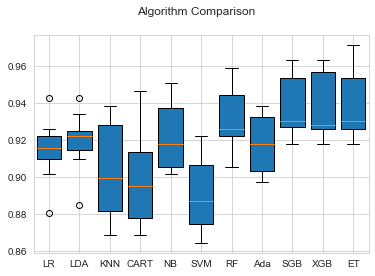

In [136]:
#A Box Plot Summarizing the comparison in Performance of the models

import matplotlib.pyplot as plt  #For Generating the plots

fig = plt.figure()
fig.suptitle('Algorithm Comparison')
ax = fig.add_subplot(111)
plt.boxplot(results, widths = 0.8, patch_artist = True)  #Changing teh width of the bars using the width attribute
ax.set_xticklabels(names)
plt.show()

From this i can see that `Random Forests, RF`, `Stochastic Gradient Boosting, SGB`, `XG-boost, XGB` and `Extra Trees, ET` have the highest accuracy with XG-boost having the highest MCC score. 

However in my predictions submitted on kaggle, `Gaussian Naive Bayes, NB` gave the highest prediction accuracy (MCC) of 0.99559 that was not comparable to any other algorithms, using all the features. Its worthy to conclude in this prediction problem that reducing the number of features by even one, the accuracy of the prediction will decrease much further implying we did not have any redundant feature in the dataset.    

This is however not the case with every prediction problem, as to some (especially those with multiple features) perorming a feature selection with greatly imporove the prediction accuracy.

# Finalizing my Model

Since the Gaussian Naive Bayes gave me the highest prediction score i will be interested in saving it to a file, so that next time when i need to reuse it to make a prediction, i can simply reload it.
For this i will use **`joblib`**'s <u>dump</u> function.

In [122]:
# Saving the GaussianNB Model Using joblib

from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.externals.joblib import dump
from sklearn.externals.joblib import load

array = train_data.values
X = array[:,0:11]
Y = array[:,11]
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.33, random_state=7)

# Fit the model on 33%
model = GaussianNB()
model.fit(X_train, Y_train)

# save the model to disk
filename = '/Users/kakembo/Desktop/OutMetrics/finalized_GaussianNB_model.sav'
dump(model, filename)



# To load it later from disk for use:
#   loaded_model = load(filename)
#   result = loaded_model.score(X_test, Y_test)


['/Users/kakembo/Desktop/OutMetrics/finalized_GaussianNB_model.sav']

# References

- https://towardsdatascience.com/exploratory-data-analysis-8fc1cb20fd15  - Exploratoty Data analysis article on `towardsdatascience.com` by `Prasad Patil`

- https://medium.com/@ODSC/transforming-skewed-data-for-machine-learning-90e6cc364b0 - Skewness in data and. how transform skewed data.

- https://machinelearningmastery.com/prepare-data-machine-learning-python-scikit-learn/  - preparing Data for machine Learning by Jason Brownlee on May 18, 2016 in Python Machine Learning

- https://www.dataquest.io/blog/machine-learning-preparing-data/ - Data Cleaning and Preparation for Machine Learning

- https://machinelearningmastery.com/an-introduction-to-feature-selection/ - Introduction to feature selelction, By Jason Brownlee on October 6, 2014 in Machine Learning Process

- https://www.tutorialspoint.com/machine_learning_with_python/machine_learning_with_python_data_feature_selection.htm - Machine learning with Python from Tutorialspoint.com 

- https://medium.com/@Mandysidana/machine-learning-types-of-classification-9497bd4f2e14 - Machine Learning Classification algorithms on medium.com by Mandy Sidana

- https://towardsdatascience.com/why-feature-correlation-matters-a-lot-847e8ba439c4

- https://towardsdatascience.com/decision-tree-in-machine-learning-e380942a4c96

- https://machinelearningmastery.com/understand-problem-get-better-results-using-exploratory-data-analysis/

- https://towardsdatascience.com/decision-tree-in-machine-learning-e380942a4c96 - Implementing a decision tree in Python

- https://machinelearningmastery.com/logistic-regression-for-machine-learning/ - Logistic Regression for Machine Learning By Jason Brownlee on April 1, 2016 in Machine Learning Algorithms 

- https://towardsdatascience.com/logistic-regression-using-python-sklearn-numpy-mnist-handwriting-recognition-matplotlib-a6b31e2b166a - Logistic Regression using Python (scikit-learn) by Michael Galarnyk

- https://machinelearningmastery.com/naive-bayes-for-machine-learning/ - Naive Bayes for Machine Learning By Jason Brownlee on April 11, 2016 in Machine Learning Algorithms 

- https://medium.com/@LSchultebraucks/gaussian-naive-bayes-19156306079b - Gaussian Naive Bayes  by Lasse Schultebraucks

- https://towardsdatascience.com/how-to-impliment-a-gaussian-naive-bayes-classifier-in-python-from-scratch-11e0b80faf5a - How to implement a Gaussian Naive Bayes Classifier in Python from scratch? by Vasile Păpăluță on towardsdatascience.com

- https://scikit-learn.org/stable/modules/generated/sklearn.naive_bayes.GaussianNB.html - Implementing GaussianNB in sklearn

- https://scikit-learn.org/stable/modules/generated/sklearn.discriminant_analysis.LinearDiscriminantAnalysis.html - Implementing LinearDiscriminantAnalysis in sklearn

- https://towardsdatascience.com/linear-discriminant-analysis-in-python-76b8b17817c2 - Linear Discriminant Analysis In Python by Cory Maklin on towardsdatascience.com

- https://towardsdatascience.com/ensemble-learning-using-scikit-learn-85c4531ff86a - Building an Ensemble Learning Model Using Scikit-learn by Eijaz Allibhai


---
*Special credits and thanks*  to the [Github notebook](https://github.com/atwine/ace-class-notes/blob/master/Thur%2020%20Feb/ACE_ClassML%20Pipeline_edit.ipynb) prepared by `Mr.Atwine Mugume Twinamatsiko`  that was a very handful template for me to come up with my final notebook

---
---
